# The Kelly criterion

In [5]:
import random as rn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Task:

Play the game at the link above using the betting strategy you described. Place a total of
20 bets (or fewer if you run out of money). Take a screenshot of the results when you are done.
Be honest! — Show the real results of applying your betting strategy to this game.

Strategy:

- Bet 10% of the initial balance (ie. 25 USD) on Head then Tail.
- Double the hand to 50 USD if you lose 25 USD twice in a row.

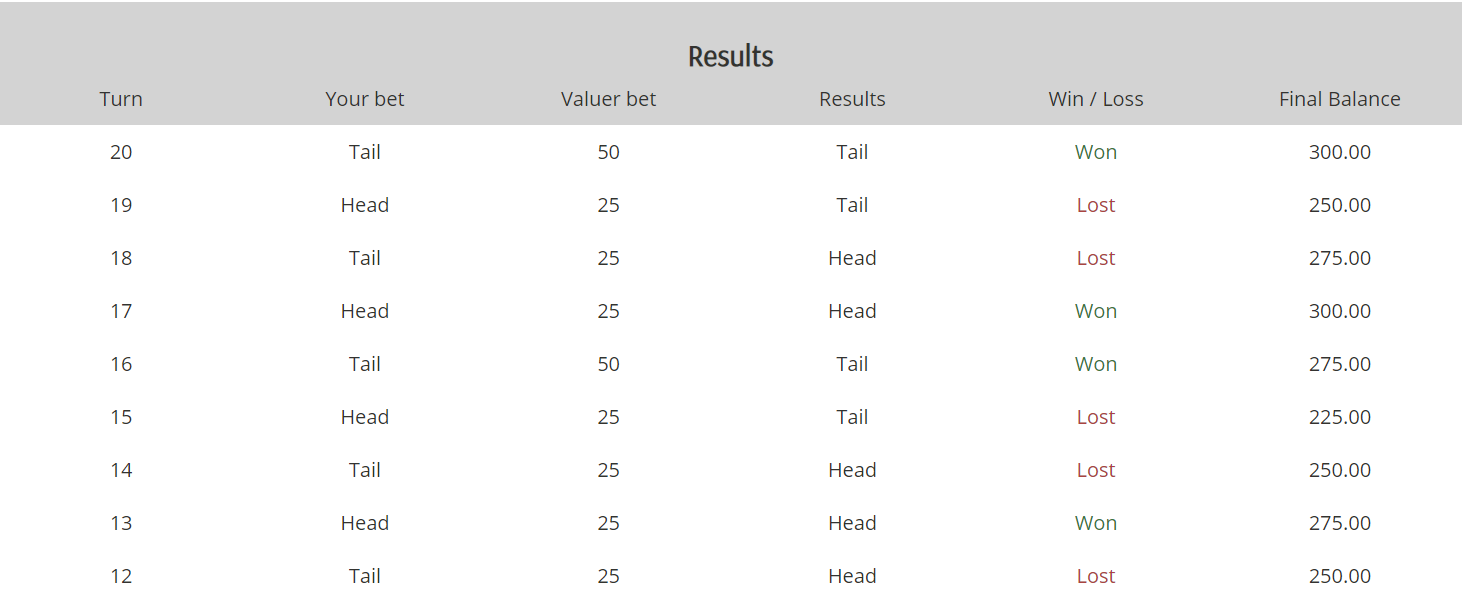

In [23]:
from PIL import Image
Image.open('bet.png')

Task: 

Implement the coin flip game as well as your betting strategy in a Python simulation. Run the simulation at least 1000 times and plot a histogram of the amount of money you have left at the end. Use your results to estimate a 95% confidence interval of the amount of money you will have left at the end of 20 coin flips using your betting strategy.

In [80]:
def flip_coin(p):
    return True if rn.random() < p else False

N, pr, count, tracks = 10**6, .5, 0, []
for _ in range(N):
    track = []
    balance = 250
    #while (0 < balance < 2500) and len(track) < 21:
    while len(track) < 21:
        bet = 25 if count < 2 else 50
        if flip_coin(pr):
            count = 0
            balance += bet
        else:
            count += 1
            balance -= bet
        track.append(balance)
        count += 1
    tracks.append(track)


The number of busts:  82859 
The number of wins:  917141

Confidence interval:  -75.0 525.0


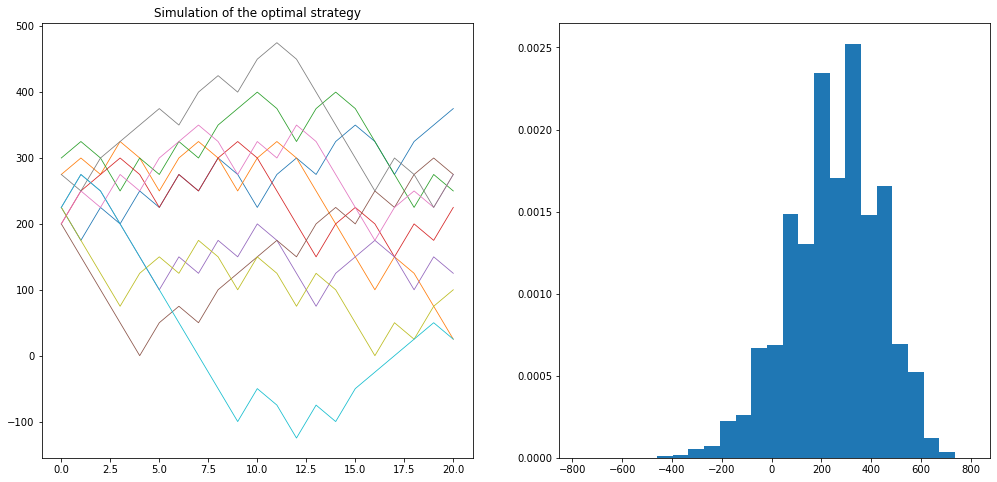

In [81]:
won, bust = 0, 0
for _ in tracks:
    if _[-1] < 0: bust +=1
    else: won +=1
        
amount = np.array([track[-1] for track in tracks])
print('\nThe number of busts: ', bust, '\nThe number of wins: ', won)
print('\nConfidence interval: ', 
      round(np.percentile(amount, 5), 2), 
      round(np.percentile(amount, 95), 2))

plt.figure(figsize=(17, 8))
plt.subplot(1,2,1)
for _ in tracks[:10]:
    plt.plot(_, linewidth=.8)
plt.title('Simulation of the optimal strategy')

plt.subplot(1,2,2)
plt.hist([track[-1] for track in tracks], density=True, bins=25)
plt.show()

# Optimal strategy using Kelly's criterion

In [2]:
# Function to impliment a biased coin
def flip(p):
    return "H" if rn.random() < p else "T"

summ = []
for _ in range(10**3):
    summ.append(flip(0.6))

print('Count of landing heads: ', summ.count("H"),
      '\nCount of landing tails: ', summ.count("T"))

Count of landing heads:  590 
Count of landing tails:  410



The number of busts:  0 
The number of wins:  10


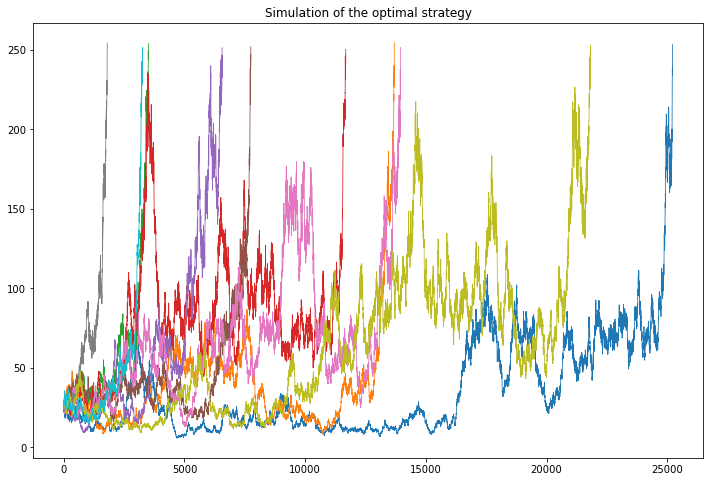

In [3]:
# Playing the optimal strategy
"""
Following the rule of Kelly at each trial, the participant
should bet 20% of the balance on heads every time.
This method would maximize the outcome of the play.
"""

def flip_coin(p):
    return True if rn.random() < p else False

N, pr, tracks = 10, .51, []
for _ in range(N):
    track = []
    balance = 25
    while balance > 2 and balance < 250:
        bet = (2*pr-1) * balance
        if flip_coin(pr):
            balance += bet
        else:
            balance -= bet
        track.append(balance)
    tracks.append(track)

won, bust = 0, 0
for _ in tracks:
    if _[-1] < 2:
        bust +=1 
    else:
        won +=1
print('\nThe number of busts: ', bust,
      '\nThe number of wins: ', won)

plt.figure(figsize=(12, 8))
for _ in tracks:
    plt.plot(_, linewidth=.8)
plt.title('Simulation of the optimal strategy')
plt.show()

In [20]:
# An attempt to generalize the idea:

# I. Changing the bias of the coin to test the Kelly rule

def flip_coin(p):
    return True if rn.random() < p else False

N = 1000
results = []
for pr in range(5100, 10000, 2):
    bust, win = 0, 0
    for _ in range(N):
        balance = 25
        while balance > 2 and balance < 250:
            bet = (2*(pr/10000)-1) * balance
            if flip_coin(pr/10000):
                balance += bet
            else:
                balance -= bet
        if balance < 2:
            bust += 1
        else:
            win += 1
    results.append([pr/10000, bust, win, win/(win+bust)])

results = pd.DataFrame(results)
results.columns=['Bias', 'Bust', 'Win', 'Rate']

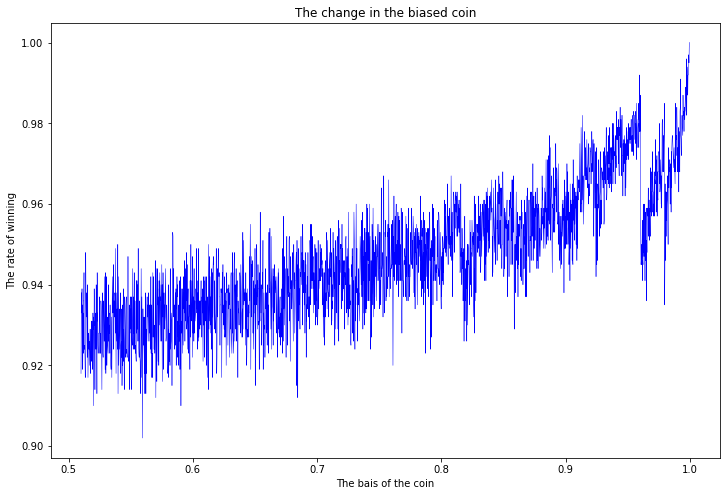

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(results['Bias'], results['Rate'], linewidth=.5, color='blue')
plt.title('The change in the biased coin')
plt.xlabel('The bais of the coin')
plt.ylabel('The rate of winning')
plt.show()

In [7]:
# Tunning the interval of the Kelly Criterion
"""
Holding the bias at .6 for the coin to land head
Changing the Kelly Criterion between 10 to 30%
"""

N, pr = 1000, 0.6
result = []

for i in range(5, 50):
    bust, win = 0, 0
    record = []
    for _ in range(N):
        balance = 25
        trials = 0
        while balance > 2 and balance < 250:
            trials += 1
            bet = (i/100) * balance
            if flip_coin(pr):
                balance += bet
            else:
                balance -= bet
        if balance < 2:
            bust += 1
        else:
            win += 1
        record.append(trials)
    result.append([i/100, int(np.mean(record)), bust, win, win/(win+bust)])
result = pd.DataFrame(result)
result.columns=['Percentage', 'Average trials',
                'Bust', 'Win', 'Rate']
result.head(10)

,Percentage,Average trials,Bust,Win,Rate
0,0.05,262,0,1000,1.000
1,0.06,228,0,1000,1.000
2,0.07,202,0,1000,1.000
3,0.08,181,0,1000,1.000
4,0.09,167,1,999,0.999
5,0.10,160,1,999,0.999
6,0.11,145,1,999,0.999
7,0.12,139,3,997,0.997
8,0.13,137,0,1000,1.000
9,0.14,130,10,990,0.990


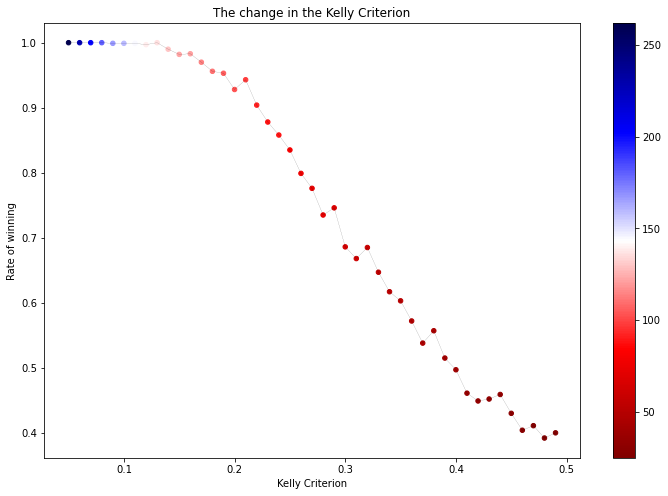

In [14]:
plt.figure(figsize=(12, 8))
jet=plt.get_cmap('seismic_r')

plt.scatter(result['Percentage'], result['Rate'],
            c= result['Average trials'], s=20, cmap=jet)
plt.plot(result['Percentage'], result['Rate'],
        linewidth=.1, color='black')
plt.title('The change in the Kelly Criterion')
plt.ylabel('Rate of winning')
plt.xlabel('Kelly Criterion')
plt.colorbar()
plt.show()